In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
plt.figsize=(15,15)

In [3]:
# load the training data
animals_train = loadmat('ex4_animals.mat')
df = pd.DataFrame(animals_train['ex4_train'][0][0],columns=['Height', 'Weight', 'Sick', 'Animal Type'])
animal_list = animals_train['ex4_train'][0][1]
# subtract 1 from animal type
df['Animal Type'] = df['Animal Type'] - 1
# replace animal type with animal name
df['Animal Type'] = df['Animal Type'].replace(list(range(0,14)),animal_list)
# switch the animal type and sick columns
df_train = df[['Height', 'Weight', 'Animal Type', 'Sick']]
animals = df_train['Animal Type']
animals = [i[0] for i in animals]


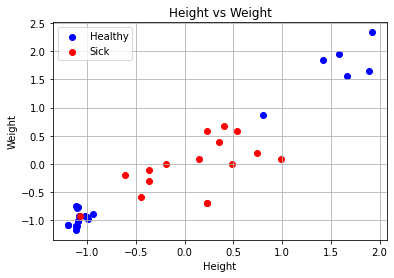

In [4]:
# scatter plot of height and weight, marker color is red if sick is 1, blue if sick is 0. also add a legend
plt.scatter(df_train['Height'][df_train['Sick']==0],df_train['Weight'][df_train['Sick']==0],c='b',label='Healthy')
plt.scatter(df_train['Height'][df_train['Sick']==1],df_train['Weight'][df_train['Sick']==1],c='r',label='Sick')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.grid()
plt.legend(['Healthy','Sick'])
plt.show()


In [5]:
animals_test = loadmat('ex4_animals_test.mat')
df_test = pd.DataFrame(animals_test['ex4_testAnimals'][0][1],columns=['Height', 'Weight'])

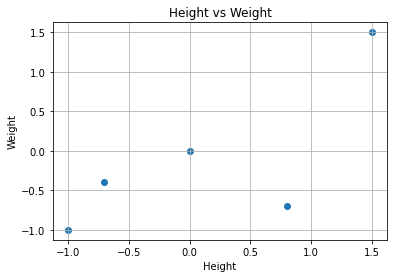

In [6]:
plt.scatter(df_test['Height'],df_test['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.grid()
plt.show()

In [7]:
# create a NearestNeighbor function to check for closest neighbor and classify if sick or not
def nearest_neighbor(train, test,k=1):
    # create a list to store the animal type
    pred = []
    # loop through the test data
    for i in range(len(test)):
        # calculate the distance between the test data and each row of the training data
        distance = np.sqrt((train['Height']-test['Height'][i])**2+(train['Weight']-test['Weight'][i])**2)
        # find the k closest neighbors
        index = distance.sort_values().index[:k]
        # use the mode of the k closest neighbors to predict if sick or not
        # if the mode is 1, then the animal is sick, if the mode is 0, then the animal is healthy
        # if there is a tie, then the animal is healthy
        if train['Sick'][index].mode()[0] == 1:
            pred.append(1)
        else:
            pred.append(0)
    return pred

In [8]:
# predict the animal type for the test data
pred = nearest_neighbor(df_train,df_test,k=20)
# add pred to Sick column
df_test['Sick'] = pred

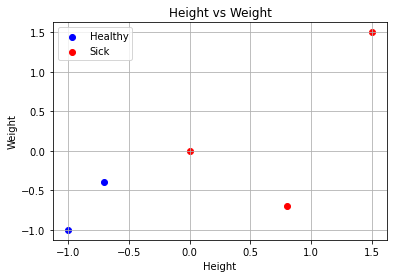

In [9]:
# plot a scatter plot of the test data, marker color is red if sick is 1, blue if sick is 0. also add a legend
plt.scatter(df_test['Height'][df_test['Sick']==0],df_test['Weight'][df_test['Sick']==0],c='b',label='Healthy')
plt.scatter(df_test['Height'][df_test['Sick']==1],df_test['Weight'][df_test['Sick']==1],c='r',label='Sick')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.grid()
plt.legend(['Healthy','Sick'])
plt.show()


3.

In [10]:
# create k_means function. use k samples from the training data as the initial centroids
def k_means(train,k=5,max_iterations=100):
    plt.figure(figsize=(15,15))
    # check if k is greater than the number of samples in the training data
    if k > len(train):
        print('K needs to be smaller than the number of samples')
        return

    # randomly select k samples data as centroids
    centroids = train.sample(k)

    for i in range(max_iterations):
        # create a list to store the cluster number
        cluster = []
        # loop through the training data
        for j in range(len(train)):
            # calculate the distance between the training data and each centroid
            distance = np.sqrt((train['Height'][j]-centroids['Height'])**2+(train['Weight'][j]-centroids['Weight'])**2)
            # find the closest centroid
            index = distance.sort_values().index[0]
            # add the cluster number to the list
            cluster.append(index)
        # add the cluster number to the training data
        train['Cluster'] = cluster
        # calculate the new centroids
        old_centroids = centroids
        centroids = train.groupby('Cluster').mean(numeric_only=True)

        # create a 3*3 subplot and plot the clusters and centroids for every iteration up to 9 iterations

        if i < 9:
            # create a subplot
            plt.subplot(3,3,i+1)
            for j,cluster in enumerate(list(train['Cluster'].unique())):
                plt.scatter(train['Height'][train['Cluster']==cluster],train['Weight'][train['Cluster']==cluster],label='Cluster {}'.format(j+1))
            plt.scatter(centroids['Height'],centroids['Weight'],c='k',marker='x',s=100,label='Centroids')
            plt.xlabel('Height')
            plt.ylabel('Weight')
            plt.title('Iteration {}'.format(i+1))
            plt.grid()
            plt.legend()
            # create bigger space between subplots
            plt.subplots_adjust(hspace=0.3)
            plt.subplots_adjust(wspace=0.3)


        # check if the centroids are the same as the previous iteration
        if i > 0:
            if centroids.equals(old_centroids):
                plt.suptitle('K = {}, Converged in {} iterations'.format(k,min(i,max_iterations)+1),fontsize=20)
                print('Converged after {} iterations'.format(i+1))
                break

    return centroids


/var/folders/8p/23bjnf312yl6j5gyncg1j7r80000gn/T/ipykernel_22770/1233678795.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cluster'] = cluster


Converged after 7 iterations


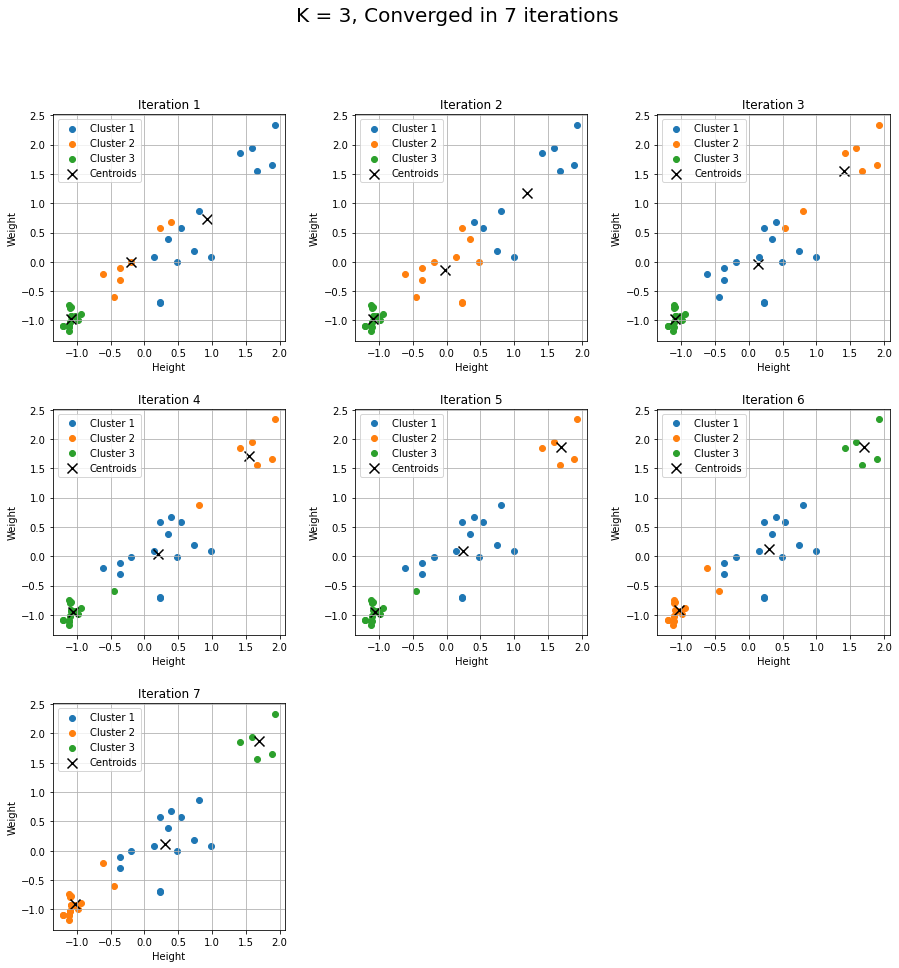

In [11]:
centroids = k_means(df_train,k=3,max_iterations=100)

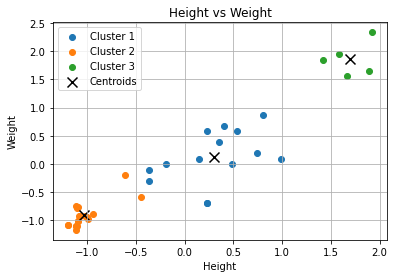

In [12]:
# plot the clusters and use different colors for each cluster
for i,cluster in enumerate(list(df_train['Cluster'].unique())):
    plt.scatter(df_train['Height'][df_train['Cluster']==cluster],df_train['Weight'][df_train['Cluster']==cluster],label='Cluster {}'.format(i+1))
# plot the centroids
plt.scatter(centroids['Height'],centroids['Weight'],c='k',marker='x',s=100,label='Centroids')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.grid()
plt.legend()
plt.show()

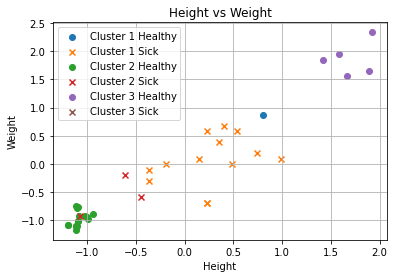

In [13]:
# plot the clusters and use different shape for sick and healthy animals
for i,cluster in enumerate(list(df_train['Cluster'].unique())):
    plt.scatter(df_train['Height'][df_train['Cluster']==cluster][df_train['Sick']==0],df_train['Weight'][df_train['Cluster']==cluster][df_train['Sick']==0],label='Cluster {} Healthy'.format(i+1))
    plt.scatter(df_train['Height'][df_train['Cluster']==cluster][df_train['Sick']==1],df_train['Weight'][df_train['Cluster']==cluster][df_train['Sick']==1],label='Cluster {} Sick'.format(i+1),marker='x')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.grid()
plt.legend()
plt.show()


In [14]:
# using the centroids predict which cluster the test data belongs to
cluster = []
# loop through the test data
for i in range(len(df_test)):
    # calculate the distance between the test data and each centroid
    distance = np.sqrt((df_test['Height'][i]-centroids['Height'])**2+(df_test['Weight'][i]-centroids['Weight'])**2)
    # find the closest centroid
    index = distance.sort_values().index[0]
    # add the cluster number to the list
    cluster.append(index)
# add the cluster number to the test data
df_test['Cluster'] = cluster


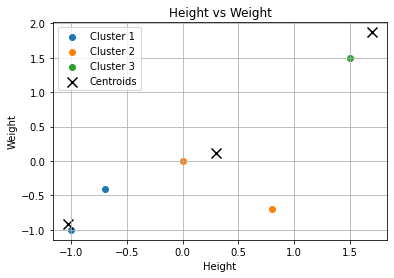

In [15]:
# plot the centroids and the test data
for i,cluster in enumerate(list(df_test['Cluster'].unique())):
    plt.scatter(df_test['Height'][df_test['Cluster']==cluster],df_test['Weight'][df_test['Cluster']==cluster],label='Cluster {}'.format(i+1))
plt.scatter(centroids['Height'],centroids['Weight'],c='k',marker='x',s=100,label='Centroids')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.grid()
plt.legend()
plt.show()



4.

In [16]:
df_train = pd.DataFrame(loadmat('ex4_midichalorians.mat')['ex4_withMidichlorians'],columns=['Height','Weight','Midichlorian level'])

In [17]:
# rewrite the function above for 3d data
def k_means3d(train,k=3,max_iterations=100, view=(30,-45)):
    fig = plt.figure(figsize=(15,15))
    # check if k is greater than the number of samples in the training data
    if k > len(train):
        print('K needs to be smaller than the number of samples')
        return

    # randomly select k samples data as centroids
    centroids = train.sample(k)

    for i in range(max_iterations):
        # create a list to store the cluster number
        cluster = []
        # loop through the training data
        for j in range(len(train)):
            # calculate the distance between the training data and each centroid
            distance = np.sqrt((train['Height'][j]-centroids['Height'])**2+(train['Weight'][j]-centroids['Weight'])**2+(train['Midichlorian level'][j]-centroids['Midichlorian level'])**2)
            # find the closest centroid
            index = distance.sort_values().index[0]
            # add the cluster number to the list
            cluster.append(index)
        # add the cluster number to the training data
        train['Cluster'] = cluster
        # calculate the new centroids
        old_centroids = centroids
        centroids = train.groupby('Cluster').mean(numeric_only=True)

        # create a 3*3 subplot and plot the clusters and centroids for every iteration up to 9 iterations
        if i < 9:
            # create a subplot
            ax = fig.add_subplot(3,3,i+1,projection='3d')
            # change viewing angle
            ax.view_init(view[0],view[1])
            for j,cluster in enumerate(list(train['Cluster'].unique())):
                # plot the clusters
                ax.scatter(train['Height'][train['Cluster']==cluster],train['Weight'][train['Cluster']==cluster],train['Midichlorian level'][train['Cluster']==cluster],label='Cluster {}'.format(j+1))
            ax.scatter(centroids['Height'],centroids['Weight'],centroids['Midichlorian level'],c='k',marker='x',s=100,label='Centroids')
            ax.set_xlabel('Height')
            ax.set_ylabel('Weight')
            ax.set_zlabel('Midichlorian level')
            ax.set_title('Iteration {}'.format(i+1))
            ax.grid()
            ax.legend()
            # create bigger space between subplots
            plt.subplots_adjust(hspace=0.3)
            plt.subplots_adjust(wspace=0.3)



        # check if the centroids are the same as the previous iteration
        if i > 0:
            if centroids.equals(old_centroids):
                plt.suptitle('K = {}, Converged in {} iterations'.format(k,min(i,max_iterations)+1),fontsize=20)
                print('Converged after {} iterations'.format(i+1))
                break

    return centroids

Converged after 16 iterations


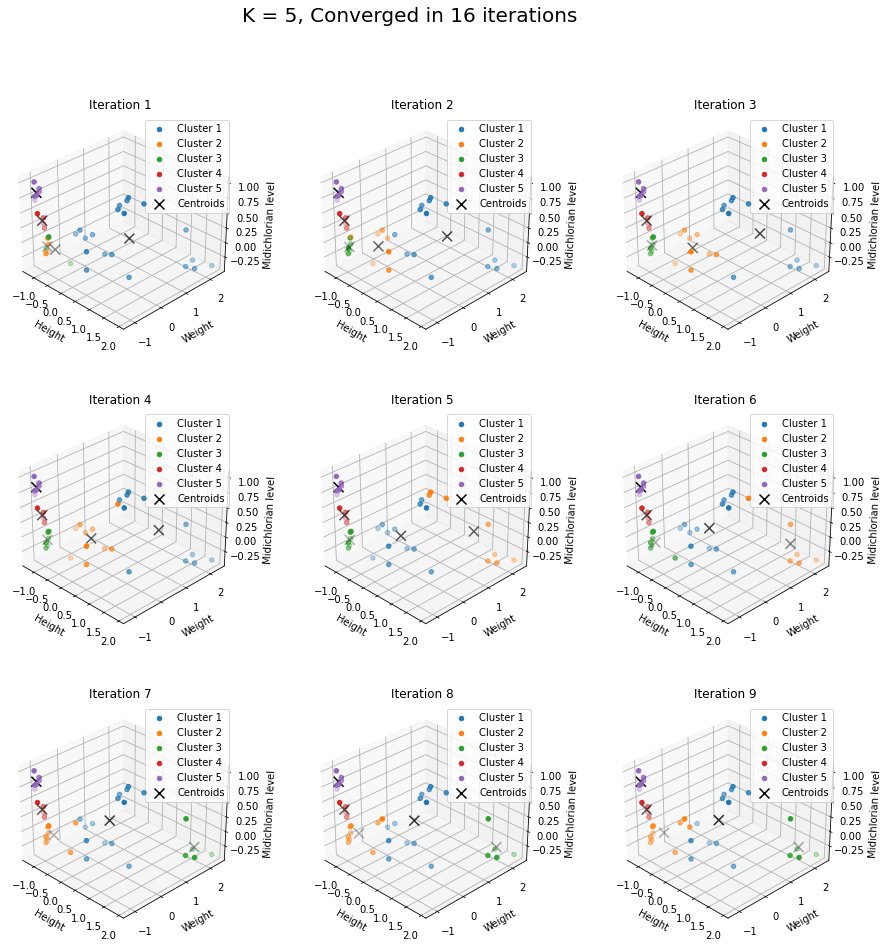

In [18]:
centroids = k_means3d(df_train,5)

4.b

In [19]:
df_test = pd.DataFrame(loadmat('ex4_JediAndSith.mat')['ex4_midi_test'],columns=['Height','Weight','Midichlorian level'])

In [20]:
df_train['Animal Type'] = animals

In [21]:
# create a dictionary with animal list as keys and numbers as values
animal_dict = {}
for i,animal in enumerate(list(df_train['Animal Type'].unique())):
    animal_dict[animal] = i

colors = ['r','g','b','c','m','y','k','orange','purple','brown','maroon','peru','lime','olive','teal']


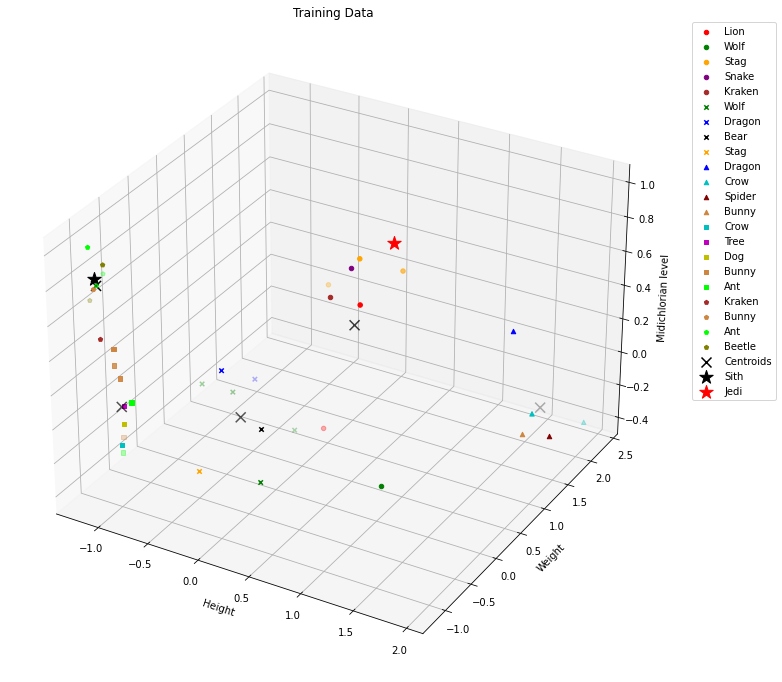

In [22]:
# plot the clusters and centroids of the training data with different shapes for each animal type in 3d
# make a list of all available matplotlib markers
# change default marker size
markers = ['o','x','^','s','p','P','*','h','+','X','D']
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')

for i,cluster in enumerate(list(df_train['Cluster'].unique())):
    for j,animal in enumerate(list(df_train['Animal Type'].unique())):
        # plot the clusters
        # check to see if the cluster has the animal type
        if animal in list(df_train['Animal Type'][df_train['Cluster']==cluster]):
            ax.scatter(df_train['Height'][df_train['Cluster']==cluster][df_train['Animal Type']==animal],df_train['Weight'][df_train['Cluster']==cluster][df_train['Animal Type']==animal],df_train['Midichlorian level'][df_train['Cluster']==cluster][df_train['Animal Type']==animal],label=animal,marker=markers[i],c=colors[animal_dict[animal]])
ax.scatter(centroids['Height'],centroids['Weight'],centroids['Midichlorian level'],c='k',marker='x',s=100,label='Centroids')
# plot the test data
ax.scatter(df_test['Height'][0],df_test['Weight'][0],df_test['Midichlorian level'][0],c='k',marker='*',s=200,label='Sith')
ax.scatter(df_test['Height'][1],df_test['Weight'][1],df_test['Midichlorian level'][1],c='r',marker='*',s=200,label='Jedi')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Midichlorian level')
ax.set_title('Training Data')
ax.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()